# Pkgs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 设置随机种子，保证数据复现
np.random.seed(1989)

In [3]:
# 整理需要输出的随机漫步信息
def show_walk_info(walks):
    # 有多少个随机漫步
    ndim = walks.ndim
    if ndim==1:
        walk_cnt = 1
    else:
        walk_cnt = walks.shape[0]
    # 最远距离
    max_dist = walks.max()
    min_dist = walks.min()
    most_far_dist = max(abs(max_dist), abs(min_dist))
    
    # 核心信息输出
    print(f'一共有:{walk_cnt}个随机漫步序列。')
    print(f'所有随机漫步的最小值:{min_dist}；')
    print(f'所有随机漫步的最大值:{max_dist}；')
    print(f'所有随机漫步, 最远达到:{most_far_dist}步。')
    
    
def plot_a_walk(walk):
    import matplotlib.pyplot as plt
    plt.plot(walk)
    plt.title("Random walk with +1/-1 steps");

# 用python生成一个随机漫步

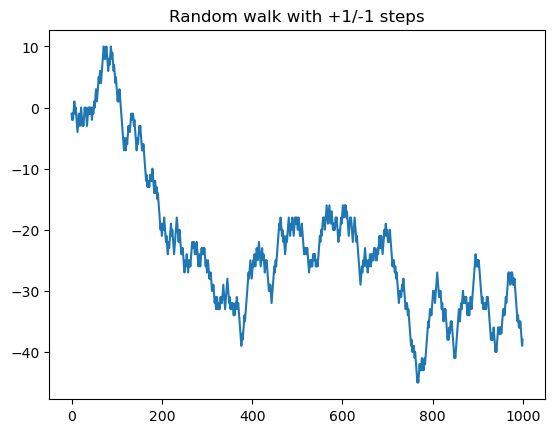

In [4]:
position = 0
walk = []
steps = 1000

for i in range(steps):
    step = 1 if np.random.randint(0, 2) else -1
    position = position + step
    walk.append(position)

plt.plot(walk)
plt.title("Random walk with +1/-1 steps");

# 用Numpy生成一个随机漫步

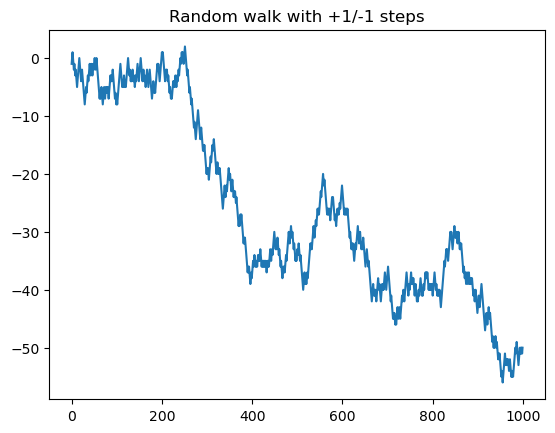

In [5]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

plt.plot(walk)
plt.title("Random walk with +1/-1 steps");

In [6]:
# 基本信息
show_walk_info(walk)

一共有:1个随机漫步序列。
所有随机漫步的最小值:-56；
所有随机漫步的最大值:2；
所有随机漫步, 最远达到:56步。


# 一次模拟多个随机漫步

In [7]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))    # 生成范围，前包后不包  
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(axis=-1)

In [8]:
# array的维度
print(walks.ndim)
print(walks.shape)

2
(5000, 1000)


## 分析随机漫步

In [9]:
# 基本信息
show_walk_info(walks)

一共有:5000个随机漫步序列。
所有随机漫步的最小值:-118；
所有随机漫步的最大值:114；
所有随机漫步, 最远达到:118步。


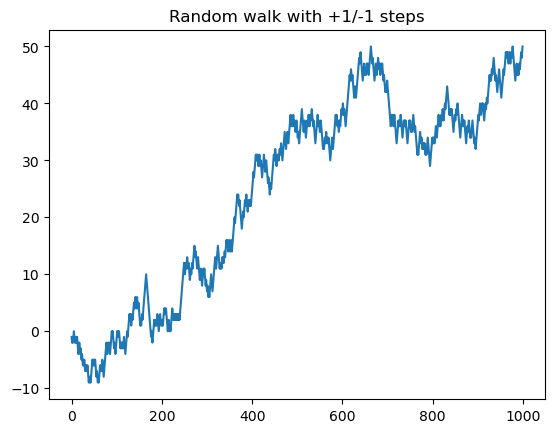

In [10]:
# 其中一个随机漫步的图像
plot_a_walk(walks[99])

## 首次穿越的时间

In [11]:
hits = 30
hits_result = (np.abs(walks)>=hits).any(1)   # 筛选出穿越30的随机漫步
hits_walks = walks[hits_result]

show_walk_info(hits_walks)

hits_walks_cnt = hits_result.sum()
print(f'{hits_walks_cnt}个随机漫步穿越了{hits}!， 占比{hits_walks_cnt/nwalks*100}%')

一共有:3373个随机漫步序列。
所有随机漫步的最小值:-118；
所有随机漫步的最大值:114；
所有随机漫步, 最远达到:118步。
3373个随机漫步穿越了30!， 占比67.46%


In [12]:
# 筛选出穿越30的随机漫步， 并获取在轴1上的穿越时间
crossing_times = (np.abs(walks[hits_result])>=hits).argmax(1)   # argmax(1),获取数组最大值对应的下标
crossing_times.mean()   # 平均穿越步数

507.8265638897124